In [1]:
import pandas as pd

df = pd.read_csv('wavelet.csv')

In [2]:
X = df.iloc[:, :-1]

Y = df.iloc[:, -1]

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,844246.771846,766322.702933,676362.874956,582653.055304,487632.724253,393843.605076,305121.373537,223931.271079,154857.408559,94572.790876,...,48111.797898,93226.921534,153166.942791,222545.054532,303888.999399,391866.465254,486724.818599,582024.721112,676678.812110,766812.986354
1,851375.348222,774111.417021,683931.984637,589071.573066,493228.136977,398480.843524,308753.153052,226674.010000,156393.591442,95865.394673,...,47995.749940,93312.556147,153424.613589,223178.694361,305063.310803,394014.921374,489715.817570,586245.862100,681382.519576,772321.154907
2,884561.046834,805462.679879,712995.277572,616338.739829,518113.814785,420973.478929,328356.639683,243127.911778,169764.937039,105944.804686,...,45050.099684,90432.600876,151332.371735,222692.063303,307100.479375,399330.775529,498983.142903,599785.024406,699926.556974,796329.385742
3,875623.235671,791263.938793,693748.534380,592467.523342,491291.727575,392664.217563,300174.393228,216875.012549,146730.350371,86788.007042,...,58605.868118,108194.982183,172722.918894,246321.839503,331850.274237,423853.145715,521895.203145,620060.792082,716353.006580,807798.021463
4,862933.383222,782687.639338,689386.984217,592237.854560,493949.114379,397407.064741,306431.404397,223540.773615,153226.074482,92582.391814,...,52075.319477,98969.366795,160784.411899,231720.006889,314865.545939,404502.003237,500760.392064,597458.846946,693382.098300,785308.674817


In [4]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 25, dtype: float64

In [5]:
import numpy as np

np.unique(Y)

array([0., 1., 2., 3., 4., 5.])

In [6]:
from sklearn.mixture import GaussianMixture
import numpy as np

n_classes = len(np.unique(Y))
gmm_models = [GaussianMixture(n_components=3, covariance_type='full') for _ in range(n_classes)]

In [42]:
for i in range(n_classes):
    class_data = X[Y == i]
    gmm_models[i].fit(class_data)

In [43]:
import numpy as np

predicted_probs = np.zeros((len(X), 6))
for i in range(6):
    predicted_probs[:, i] = gmm_models[i].score_samples(X)

In [44]:
predicted_labels = np.argmax(predicted_probs, axis=1)


In [45]:
predicted_labels

array([0, 4, 0, ..., 0, 5, 1], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.72


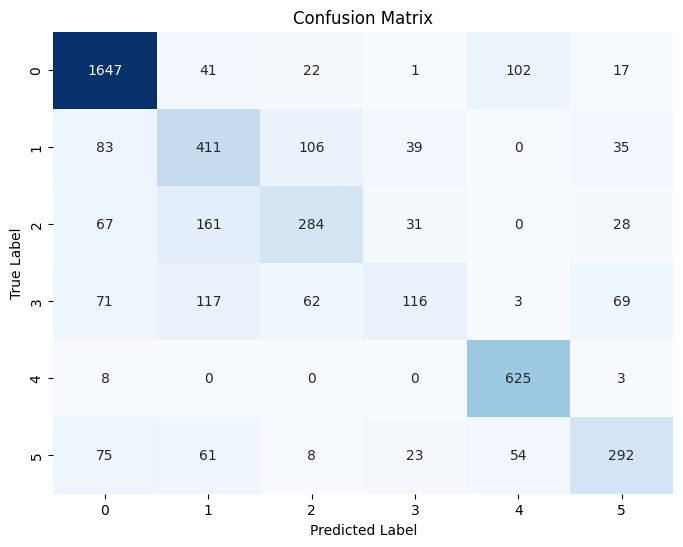

In [47]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(Y, predicted_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [48]:
from sklearn.metrics import f1_score

f1 = f1_score(Y, predicted_labels, average='weighted')
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.7100


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (y_actual) and predicted labels (y_pred)
# For each class (0, 1, 2, 3), calculate precision, recall, and F1 score
precision = precision_score(Y, predicted_labels, average=None)
recall = recall_score(Y, predicted_labels, average=None)
f1 = f1_score(Y, predicted_labels, average=None)

# Print results for each class
for class_label in range(6):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}\n")


Class 0:
Precision: 0.8442
Recall: 0.9000
F1 Score: 0.8712

Class 1:
Precision: 0.5196
Recall: 0.6098
F1 Score: 0.5611

Class 2:
Precision: 0.5892
Recall: 0.4974
F1 Score: 0.5394

Class 3:
Precision: 0.5524
Recall: 0.2648
F1 Score: 0.3580

Class 4:
Precision: 0.7972
Recall: 0.9827
F1 Score: 0.8803

Class 5:
Precision: 0.6577
Recall: 0.5692
F1 Score: 0.6102



In [50]:
import joblib

save_dir = './models/'

for i, gmm_model in enumerate(gmm_models):
    model_filename = f'gmm_model_{i}.pkl'
    model_path = save_dir + model_filename
    joblib.dump(gmm_model, model_path)
    print(f"Saved GMM model {i} to {model_path}")

Saved GMM model 0 to ./models/gmm_model_0.pkl
Saved GMM model 1 to ./models/gmm_model_1.pkl
Saved GMM model 2 to ./models/gmm_model_2.pkl
Saved GMM model 3 to ./models/gmm_model_3.pkl
Saved GMM model 4 to ./models/gmm_model_4.pkl
Saved GMM model 5 to ./models/gmm_model_5.pkl


: 